In [1]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
# Combined Test 

data = pd.read_excel('D:/NUIG/Final Project/FinalData/combinedTest.xlsx')

data.head(5)

,Problem Influence percentage,Total Impressions,Total Amount,Votes
0,13.5,135000.0,249.5,535022.425
1,100.0,1500000.0,599.0,535022.425
2,90.0,900000.0,599.0,535022.425
3,30.0,300000.0,249.5,535022.425
4,30.0,300000.0,100.0,535022.425


In [5]:
# dependent and independent variables

iv = data.iloc[:, 0:3]
print(iv.head(5))

dv = data.iloc[:, -1:]
dv.head(5)

   Problem Influence percentage  Total Impressions  Total Amount
0                          13.5           135000.0         249.5
1                         100.0          1500000.0         599.0
2                          90.0           900000.0         599.0
3                          30.0           300000.0         249.5
4                          30.0           300000.0         100.0


,Votes
0,535022.425
1,535022.425
2,535022.425
3,535022.425
4,535022.425


In [6]:
# split train , test data 

X_train, X_test, y_train, y_test = train_test_split(iv, dv)

In [7]:
# Gradient Boosting Regressor using parameters with best accuracy

base_model_GB = GradientBoostingRegressor(
    max_depth=3,
    n_estimators=100,
    learning_rate=0.1
)

In [8]:
base_model_GB.fit(X_train, y_train)

D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
# Base model Error calculation

y_pred = base_model_GB.predict(X_test)
MAE_calc = mean_absolute_error(y_test, y_pred)

MAE = round(MAE_calc,2)

print('Mean Absolute Error:'+ str(MAE))




Mean Absolute Error:50112.01


In [10]:
# Base Model Accuracy

Accuracy_calc = base_model_GB.score(X_train, y_train)
Base_Accuracy_GB = round(Accuracy_calc, 2)*100

print('Base Accuracy:' + str(Base_Accuracy_GB))

Base Accuracy:72.0


In [11]:
# Model Building function

def train_GB(est, max_depth, lr):
    
    gb = GradientBoostingRegressor(n_estimators=est, max_depth=max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(X_test)
    Acc = (gb.score(X_train, y_train))
    return (round(Acc,2)*100), est , max_depth , lr
   
    

In [12]:
# Parameter Tuning 

for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            print(train_GB(n_est, max_depth, lr))


D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

(27.0, 50, 3, 0.01)
(63.0, 50, 3, 0.1)
(87.0, 50, 3, 1)
(45.0, 50, 7, 0.01)
(88.0, 50, 7, 0.1)
(92.0, 50, 7, 1)
(55.00000000000001, 50, 11, 0.01)
(92.0, 50, 11, 0.1)
(92.0, 50, 11, 1)
(57.99999999999999, 50, 15, 0.01)
(92.0, 50, 15, 0.1)
(92.0, 50, 15, 1)
(38.0, 100, 3, 0.01)


D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

(72.0, 100, 3, 0.1)
(90.0, 100, 3, 1)
(64.0, 100, 7, 0.01)
(91.0, 100, 7, 0.1)


D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

(92.0, 100, 7, 1)
(76.0, 100, 11, 0.01)
(92.0, 100, 11, 0.1)


D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(92.0, 100, 11, 1)
(79.0, 100, 15, 0.01)
(92.0, 100, 15, 0.1)


D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(92.0, 100, 15, 1)
(45.0, 150, 3, 0.01)
(76.0, 150, 3, 0.1)
(91.0, 150, 3, 1)


D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y =

(74.0, 150, 7, 0.01)
(92.0, 150, 7, 0.1)
(92.0, 150, 7, 1)


D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(84.0, 150, 11, 0.01)
(92.0, 150, 11, 0.1)


D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(92.0, 150, 11, 1)
(87.0, 150, 15, 0.01)
(92.0, 150, 15, 0.1)


D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(92.0, 150, 15, 1)


In [23]:
#GridSearchCV

gb = GradientBoostingRegressor()
param = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [7, 11, 15],
    'learning_rate': [0.1]
}

clf = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = clf.fit(X_train, y_train)
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)


D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.100764,0.017165,0.007413,0.002487,0.1,7,50,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.178718,0.515943,0.241668,-0.160654,0.104450,0.176025,0.218328,1
1,0.195373,0.013328,0.006210,0.000653,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.117653,0.507701,0.209807,-0.205364,0.074293,0.140818,0.229855,2
2,0.264967,0.039885,0.006450,0.001353,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.108594,0.476333,0.184501,-0.222463,0.065739,0.122541,0.224257,3
3,0.124299,0.032462,0.014207,0.010358,0.1,11,50,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",-0.024856,0.425887,0.018408,-0.207019,0.014491,0.045382,0.207415,4
5,0.341423,0.044191,0.011460,0.003891,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",-0.028090,0.427835,-0.013211,-0.256020,0.000690,0.026241,0.221860,5
4,0.214557,0.031514,0.005427,0.000435,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",-0.041364,0.442651,-0.002222,-0.283048,0.001948,0.023593,0.234518,6
6,0.105116,0.010465,0.006034,0.000762,0.1,15,50,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",-0.098971,0.415628,0.003484,-0.359391,-0.036760,-0.015202,0.249764,7
8,0.310596,0.027168,0.006285,0.000779,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",-0.101187,0.438659,0.001241,-0.379256,-0.041748,-0.016458,0.263395,8
7,0.235830,0.015374,0.007485,0.001084,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",-0.109424,0.404839,-0.008543,-0.337394,-0.032705,-0.016645,0.240608,9


In [17]:
#final model with best parameters

final_model_GB = GradientBoostingRegressor(
    max_depth=7,
    n_estimators=50,
    learning_rate=0.1
)

In [18]:
final_model_GB.fit(X_train, y_train)

D:\Anaconda_Install\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [19]:
# Final model Error calculation

y_pred = final_model_GB.predict(X_test)
MAE_calc = mean_absolute_error(y_test, y_pred)

MAE = round(MAE_calc,2)

print('Mean Absolute Error:'+ str(MAE))



Mean Absolute Error:47745.06


In [20]:
# Final Model Accuracy

Accuracy_calc = final_model_GB.score(X_train, y_train)
Final_Accuracy_GB = round(Accuracy_calc, 2)*100

print('Final Accuracy:' + str(Final_Accuracy_GB))

Final Accuracy:88.0


In [21]:
print('Improvement of {:0.2f}%.'.format(100*(Final_Accuracy_GB-Base_Accuracy_GB)/Base_Accuracy_GB))

Improvement of 22.22%.


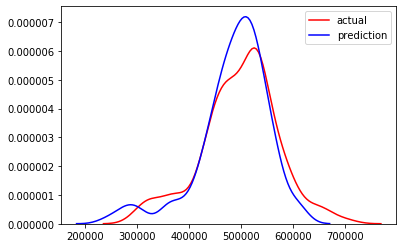

In [22]:
ax1 = sns.distplot(y_test, hist=False, color='r', label='actual')
sns_plot = sns.distplot(y_pred, hist=False, color='b',label='prediction', ax=ax1)
